Take three high dimensional data sets, at least two of those real such as COIL, FashionMNIST with at least ten dimensions e.g. from scikit or UCI KDD. Compare the result of three different dimensionality reduction methods - inspect this visually
but also compare a numeric evaluation.

Based on this code: https://mybui.github.io/dr.html

## Fashion MNIST
### Preprocessing

In [1]:
import pandas as pd

fashion_mnist_train = pd.read_csv("data/fashion_mnist_train.csv")
#fashion_mnist_test = pd.read_csv("data/fashion_mnist_test.csv")

# remove all but the first 1000 rows
fashion_mnist_train = fashion_mnist_train.iloc[:1000,:]

In [2]:
# remove column Id to reshape it ito 28*28
fashion_mnist_train = fashion_mnist_train.drop(columns=['Id'])

In [3]:
X_train, y_train = fashion_mnist_train.iloc[:, 1:].to_numpy(), fashion_mnist_train.iloc[:, 0].to_numpy()

In [4]:
# get the shape of the training data
print(X_train.shape)
print(y_train.shape)

(1000, 784)
(1000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

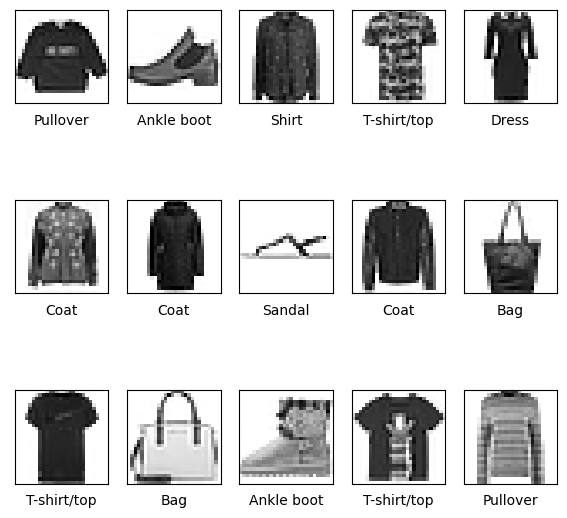

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
for i in range(15):
    plt.subplot(3, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

## PCA

Goal: **unsupervised linear projection** to a d dimensional space such that as much information as possible is preserved

statistical motivation: find the **linear projection** of the data which **preserves** as much **variation** in the data as possible

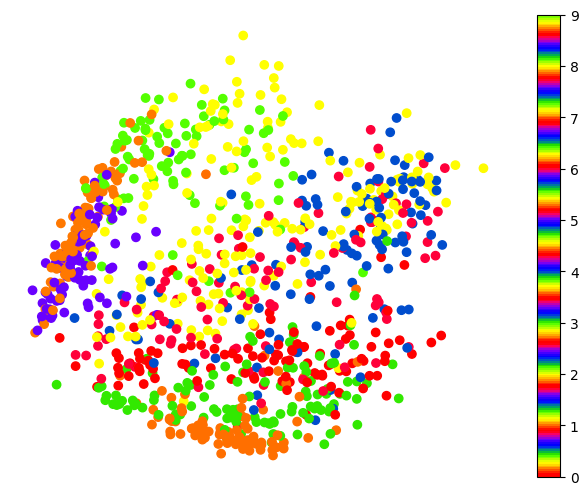

In [7]:
# perform PCA and keep 95% of variance
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that 
# needs to be explained is greater than the percentage specified by n_components.

from sklearn.decomposition import PCA

#pca = PCA(n_components=2, svd_solver='full', random_state=42).fit_transform(X_train)
pca = PCA(n_components = 0.95, svd_solver='full', random_state=42).fit_transform(X_train)

# plot pca
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=y_train, cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

In [8]:
pca = PCA(n_components = 0.95, svd_solver='full', random_state=42)
pca.fit_transform(X_train, y_train)

# The percentage of the explained variance is:
print(pca.explained_variance_ratio_[:10])

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',pca.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',pca.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(pca.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',pca.explained_variance_ratio_.sum())

[0.2849548  0.17530397 0.06379471 0.0517016  0.04105636 0.03661194
 0.0220784  0.02065181 0.01336065 0.01232263]

The maximum percentage of the explained variance is: 0.28495480200933526

The minimum percentage of the explained variance is: 0.00044530082833773443

The number of principal components is: 142

The total precentage of the explained variance is: 0.9503067223320314


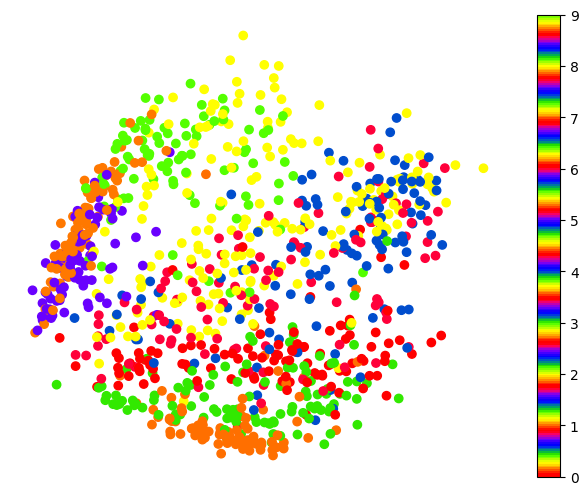

In [9]:
# PCA with 2 components, which explain ~47% of the variance
pca = PCA(n_components = 2, svd_solver='full', random_state=42).fit_transform(X_train)

# plot pca
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=y_train, cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

Most variance lies along the first two principal components

### Reconstruct data from compressed data

In [10]:
pca = PCA(n_components = 187, random_state=42)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

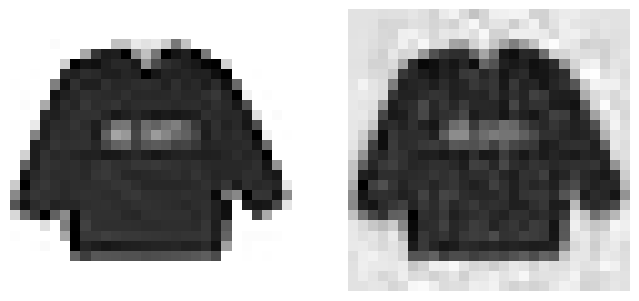

In [11]:
# plot non-reduced and reduced data
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.imshow(X_recovered[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

# LDA

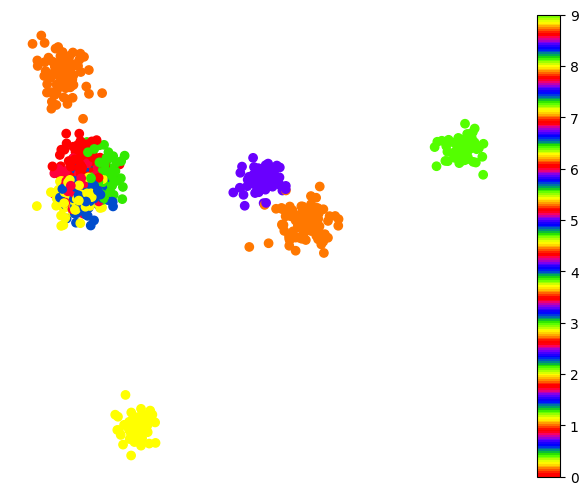

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
# plot_digits(X_lda_reduced, y_train, figsize=(8,6))

# plot lda
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

In [13]:
# n_components cannot be larger than min(n_features, n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=9)  # max 9 principal components
lda.fit_transform(X_train, y_train)

# The percentages of the explained variances
print(lda.explained_variance_ratio_)

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',lda.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',lda.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(lda.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',lda.explained_variance_ratio_.sum())

[0.44251836 0.19253394 0.11230684 0.08018742 0.06029629 0.04721487
 0.02619976 0.02269627 0.01604624]

The maximum percentage of the explained variance is: 0.4425183624496783

The minimum percentage of the explained variance is: 0.016046244369212894

The number of principal components is: 9

The total precentage of the explained variance is: 1.0


The first principal component explains ~ 44% of the variance

### tSNE


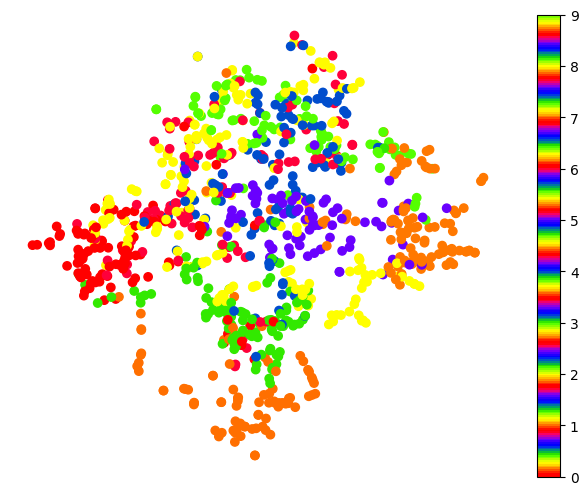

In [14]:
from sklearn.manifold import TSNE

# n_components cannot be larger than 3
tSNE = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3).fit_transform(X_train) 

plt.figure(figsize=(8, 6))
plt.scatter(tSNE[:, 0], tSNE[:, 1], c=y_train, cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()


TSNE doesn't have explained_variance_ratio_

# MNIST

In [15]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


2023-02-23 18:34:27.349768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 18:34:27.904554: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-23 18:34:27.904598: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-23 18:34:27.904602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [16]:
#get dimensions of the data
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# reshape data to fit model
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


### PCA

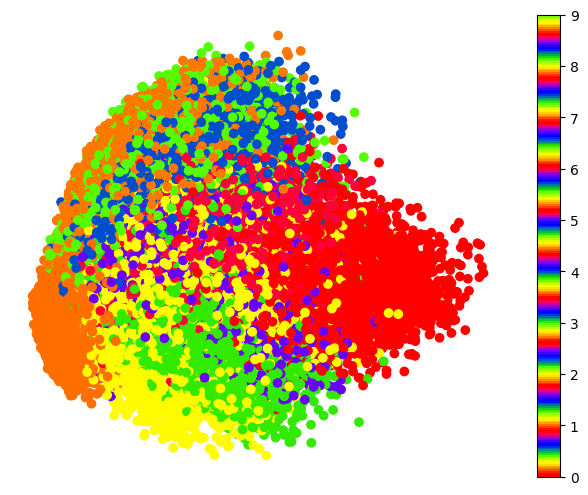

In [17]:
pca = PCA(n_components=2, svd_solver='full', random_state=42).fit_transform(X_train)

# plot pca
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=Y_train, cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

In [18]:
pca = PCA(n_components = 0.95, svd_solver='full', random_state=42)
pca.fit_transform(X_train, y_train)

# The percentage of the explained variance is:
print(pca.explained_variance_ratio_[:10])

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',pca.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',pca.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(pca.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',pca.explained_variance_ratio_.sum())

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001]

The maximum percentage of the explained variance is: 0.09704664359713934

The minimum percentage of the explained variance is: 0.0004503798797084712

The number of principal components is: 154

The total precentage of the explained variance is: 0.9501960192613026


In [19]:
pca = PCA(n_components = 187, random_state=42)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

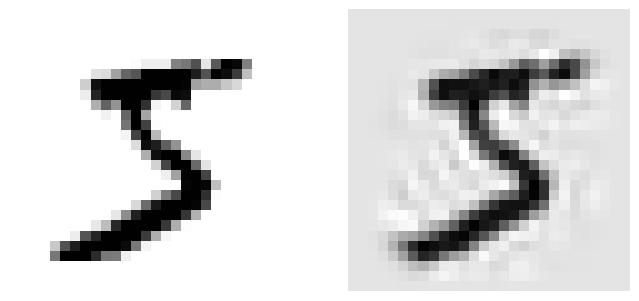

In [20]:
# plot non-reduced and reduced data
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.imshow(X_recovered[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

### LDA

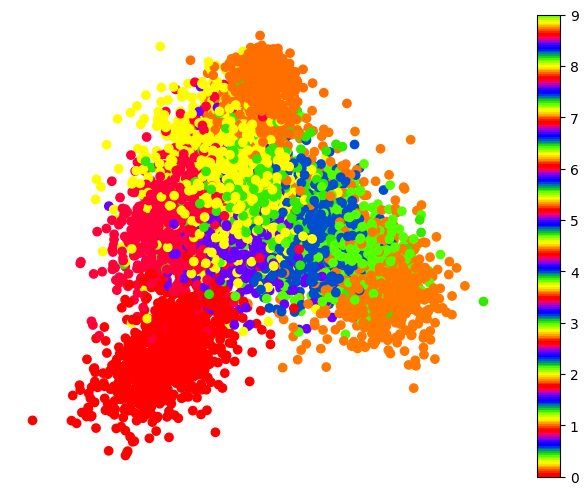

In [21]:
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train[:10000], Y_train[:10000])

# plot lda
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], c=Y_train[:10000], cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

In [22]:
# n_components cannot be larger than min(n_features, n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=9)  # max 9 principal components
lda.fit_transform(X_train, Y_train)

# The percentages of the explained variances
print(lda.explained_variance_ratio_)

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',lda.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',lda.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(lda.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',lda.explained_variance_ratio_.sum())

[0.2392286  0.20180995 0.17849695 0.10652571 0.09406712 0.06906025
 0.04973746 0.03429077 0.0267832 ]

The maximum percentage of the explained variance is: 0.2392285981056297

The minimum percentage of the explained variance is: 0.02678319908831394

The number of principal components is: 9

The total precentage of the explained variance is: 1.0


### TSNE

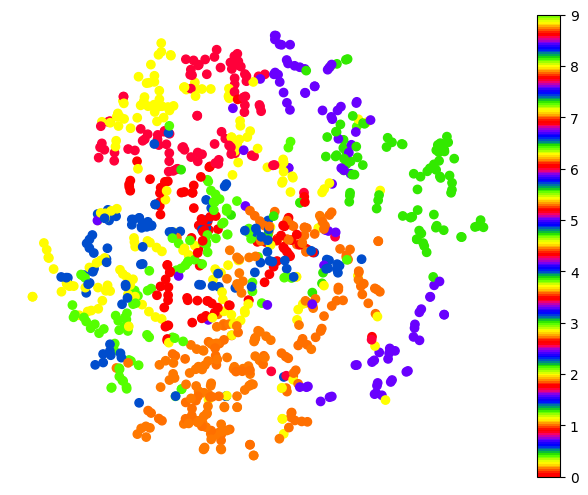

In [23]:
# n_components cannot be larger than 3
tSNE = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3).fit_transform(X_train[:1000])

plt.figure(figsize=(8, 6))
plt.scatter(tSNE[:, 0], tSNE[:, 1], c=Y_train[:1000], cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

## CIFAR-10

Loaded in this way, each of the batch files contains a dictionary with the following elements:

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


In [24]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [25]:
batch_1 = unpickle('data/cifar-10-python/cifar-10-batches-py/data_batch_1')
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

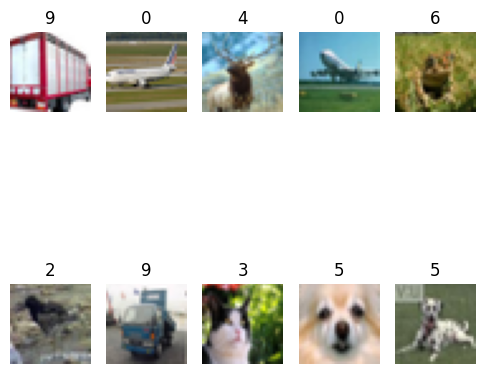

In [26]:
import numpy as np
# display the first 10 images
fig, axes1 = plt.subplots(2,5,figsize=(6,6))
for j in range(2):
    for k in range(5):
        i = np.random.choice(range(len(batch_1[b'labels'])))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(batch_1[b'data'][i].reshape(3,32,32).transpose(1,2,0))
        axes1[j][k].set_title(batch_1[b'labels'][i])
        

### PCA

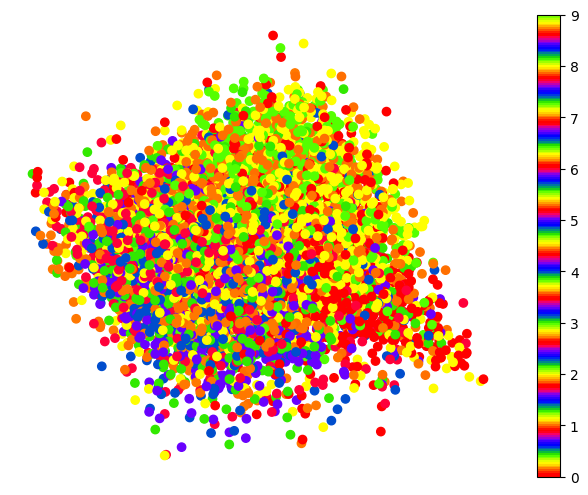

In [27]:
# perform PCA
pca = PCA(n_components=2, svd_solver='full', random_state=42).fit_transform(batch_1[b'data'])

# plot pca
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=batch_1[b'labels'], cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


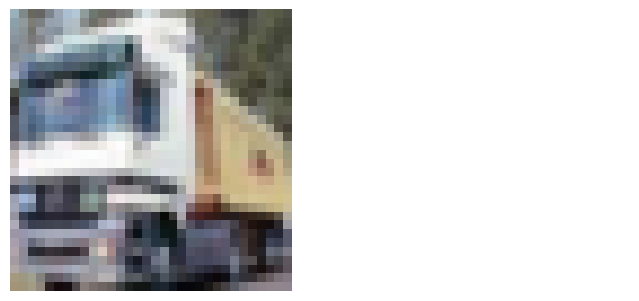

In [28]:
# revover the original data
pca = PCA(n_components = 3072, svd_solver='full', random_state=42)
pca.fit_transform(batch_1[b'data'])
X_recovered = pca.inverse_transform(pca.fit_transform(batch_1[b'data']))

# plot non-reduced and reduced data
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(batch_1[b'data'][1].reshape(3,32,32).transpose(1,2,0))
plt.axis("off")
plt.subplot(122)
plt.imshow(X_recovered[1].reshape(3,32,32).transpose(1,2,0))
plt.axis("off")
plt.show()

In [29]:
pca = PCA(n_components = 0.95, svd_solver='full', random_state=42)
pca.fit_transform(batch_1[b'data'], batch_1[b'labels'])

# The percentage of the explained variance is:
print(pca.explained_variance_ratio_[:10])

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',pca.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',pca.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(pca.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',pca.explained_variance_ratio_.sum())

[0.29329263 0.11308157 0.06575855 0.03642284 0.03561332 0.02860049
 0.02682706 0.02172233 0.02038833 0.01446287]

The maximum percentage of the explained variance is: 0.29329263411476303

The minimum percentage of the explained variance is: 0.0002552812841311601

The number of principal components is: 209

The total precentage of the explained variance is: 0.9500903815942712


### LDA

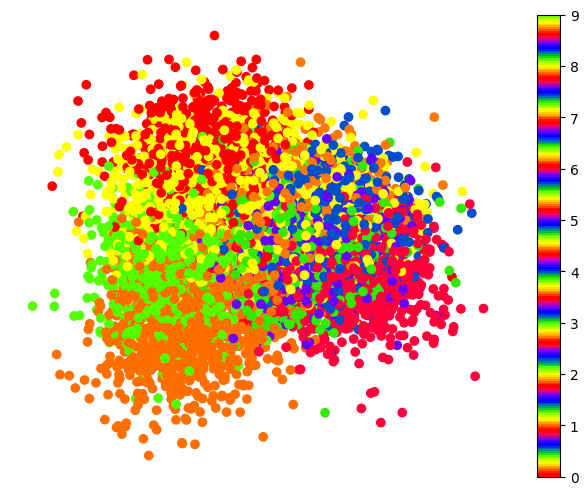

In [30]:
X_lda_reduced = LinearDiscriminantAnalysis(n_components=9).fit_transform(batch_1[b'data'], batch_1[b'labels'])

# plot lda
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], c=batch_1[b'labels'], cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()

In [31]:
lda = LinearDiscriminantAnalysis(n_components=9)  # max 9 principal components
lda.fit_transform(batch_1[b'data'], batch_1[b'labels'])

# The percentages of the explained variances
print(lda.explained_variance_ratio_)

# The maximum percentage of the explained variance is:
print('\nThe maximum percentage of the explained variance is:',lda.explained_variance_ratio_.max())

# The minimum percentage of the explained variance is:
print('\nThe minimum percentage of the explained variance is:',lda.explained_variance_ratio_.min())

print('\nThe number of principal components is:',len(lda.explained_variance_ratio_))

print('\nThe total precentage of the explained variance is:',lda.explained_variance_ratio_.sum())

[0.24077605 0.15137204 0.12301631 0.11562851 0.08767744 0.08269288
 0.06863185 0.06664122 0.06356371]

The maximum percentage of the explained variance is: 0.24077605094899143

The minimum percentage of the explained variance is: 0.06356370939184426

The number of principal components is: 9

The total precentage of the explained variance is: 1.0


### TSNE

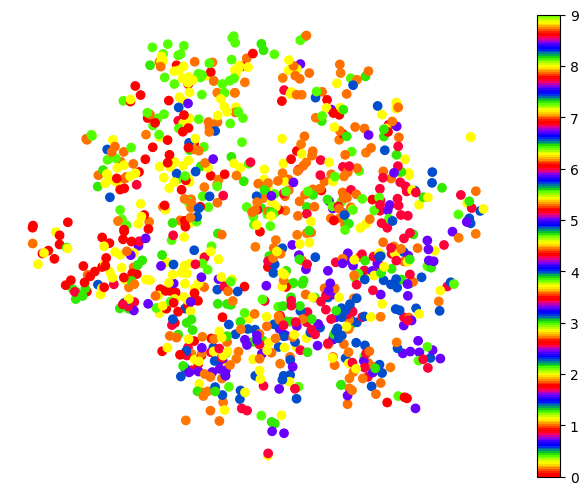

In [32]:
tSNE = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3).fit_transform(batch_1[b'data'][:1000])

plt.figure(figsize=(8, 6))
plt.scatter(tSNE[:, 0], tSNE[:, 1], c=batch_1[b'labels'][:1000], cmap="prism")
plt.axis("off")
plt.colorbar()
plt.show()